# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [44]:
# your code here
employees = pd.read_csv("../data/Employee.csv")
employees_backup = employees.copy()

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.groupby("Department")[["Salary"]].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
pd.pivot_table(employees,values="Salary",columns="Department")

Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.pivot_table(employees,values="Salary",columns=["Department","Title"])

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
pd.pivot_table(employees,values="Salary",columns="Title",index="Years",fill_value="No info")
## or below is what question asks?
#pd.pivot_table(employees,values=["Years","Salary"],columns="Title")

Title,VP,analyst,associate
Years,,,
1,No info,35,No info
2,No info,30,55
3,No info,No info,55
4,No info,35,No info
7,No info,No info,60
8,70,No info,No info


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
table1= pd.pivot_table(employees,
               values=["Salary","Name"],columns=["Department","Title"],
               aggfunc={"Salary":"mean",
                       "Name":"count"}
              ).transpose()
table1 = table1.rename(columns={"Name":"Employee Count"})
table1 = table1.astype({"Employee Count": int})
table1

Employee Count  Salary
Department Title                            
HR         VP                      1    70.0
           analyst                 2    32.5
IT         VP                      1    70.0
           analyst                 2    32.5
           associate               1    60.0
Sales      associate               2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [9]:
# your code here
pd.pivot_table(employees, values=["Salary"],columns=["Department","Title"],
               aggfunc=["median","min","max","std"]).transpose()

Salary
       Department Title               
median HR         VP         70.000000
                  analyst    32.500000
       IT         VP         70.000000
                  analyst    32.500000
                  associate  60.000000
       Sales      associate  55.000000
min    HR         VP         70.000000
                  analyst    30.000000
       IT         VP         70.000000
                  analyst    30.000000
                  associate  60.000000
       Sales      associate  55.000000
max    HR         VP         70.000000
                  analyst    35.000000
       IT         VP         70.000000
                  analyst    35.000000
                  associate  60.000000
       Sales      associate  55.000000
std    HR         analyst     3.535534
       IT         analyst     3.535534
       Sales      associate   0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
"""
your commments here

All employees with title associate are earning same salary, so that causes std dev to be 0? 
Was it the question .. :->
"""

'\nyour commments here\n\nAll employees with title associate are earning same salary, so that causes std dev to be 0? \nWas it the question .. :->\n'

In [11]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
# your code here
pd.pivot_table(employees,values=["Salary","Name"],columns=["Department"],
               aggfunc={"Salary":"sum","Name":"count"})

Department,HR,IT,Sales
Name,3,4,2
Salary,135,195,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [13]:
# your code here
pd.pivot_table(employees,values=["Salary","Years"],
               columns=["Department","Title"],aggfunc={"Salary":"mean","Years":"sum"}
              )

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0
Years        8.0     6.0   8.0     3.0       7.0       5.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [14]:
# your code here
employees.groupby("Department").max()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [15]:
max_names = employees.groupby("Department").max().iloc[:,0][0]
max_names

'''
I wanted to grab names from above pivot table and if name matches its same value in our main 
dataframe below -employees- , then I will drop that row from our dataframe.

For real case scenarios, matching name & surname or anyother specific attribute can solve this problem.

That's the way I figured out to how to match those two dataframes (pivot & main), but there should
be an easier way.. or is it the way??
'''

"\nI wanted to grab names from above pivot table and if name matches its same value in our main \ndataframe below -employees- , then I will drop that row from our dataframe.\n\nFor real case scenarios, matching name & surname or anyother specific attribute can solve this problem.\n\nThat's the way I figured out to how to match those two dataframes (pivot & main), but there should\nbe an easier way.. or is it the way??\n"

In [16]:
employees_backup = employees.copy()

for i in range(0,len(employees.groupby("Department").max())):
    employees_backup = employees_backup.drop(employees[employees["Name"] == employees.groupby("Department").max().iloc[:,0][i]].index)

employees_backup

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
8,Ana,HR,Master,F,VP,8,70


In [17]:
'''
From there I only need to create another pivot table..
'''
pd.pivot_table(employees_backup,values="Salary",columns="Department").transpose()

,Salary
Department,
HR,50
IT,45
Sales,55


# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [18]:
# your code here

In [19]:
fitbit = pd.read_csv("fitbit.csv")
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [20]:
# your code here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [21]:
fitbit.describe()
#fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [22]:
# your code here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062607

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [23]:
import matplotlib.pyplot as plt;

In [24]:
'''
CHECK LECTURE NOTES FOR SEABORN PLOT!!
'''

'\nCHECK LECTURE NOTES FOR SEABORN PLOT!!\n'

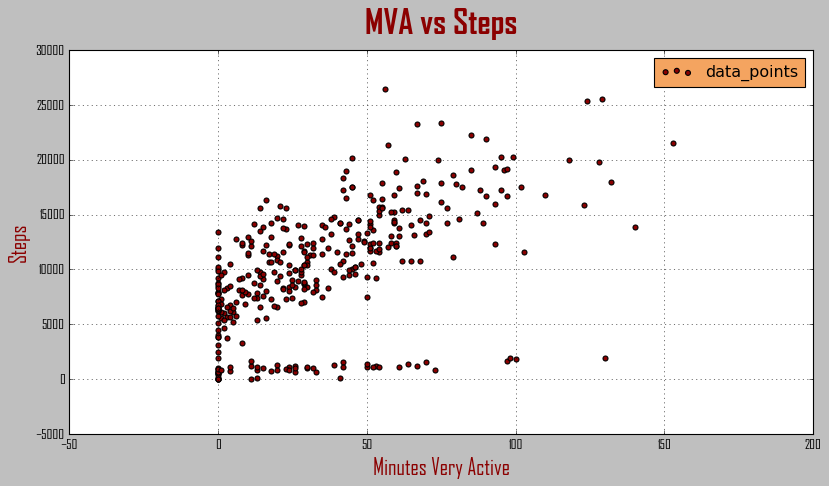

In [147]:
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams["font.family"]="agency fb"
#sns.lmplot(x="Minutes Very Active",y="Steps",data=fitbit)
plt.scatter(fitbit["Minutes Very Active"],fitbit["Steps"],linewidth=1,
            c="darkred",edgecolor="k",label="data_points")
plt.style.use("classic")
plt.title("MVA vs Steps",size=30,c="darkred",fontweight="bold",pad=15)
plt.grid(True)
plt.xlabel("Minutes Very Active",size=20,c="darkred")
plt.ylabel("Steps",size=20,c="darkred")
plt.legend(facecolor="sandybrown")
#plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [26]:
"""
Corr result is 0.57 which is close to moderate relationship between two variable.

AS for graph, we can also observe a slight positive correlation between two variable. 
But this needs to be investigated further since there are many data points available at 0 point for
both sides, which makes it hard to interpret.

"""

'\nCorr result is 0.57 which is close to moderate relationship between two variable.\n\nAS for graph, we can also observe a slight positive correlation between two variable. \nBut this needs to be investigated further since there are many data points available at 0 point for\nboth sides, which makes it hard to interpret.\n\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [46]:
# your code here

fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.0769060806299009

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

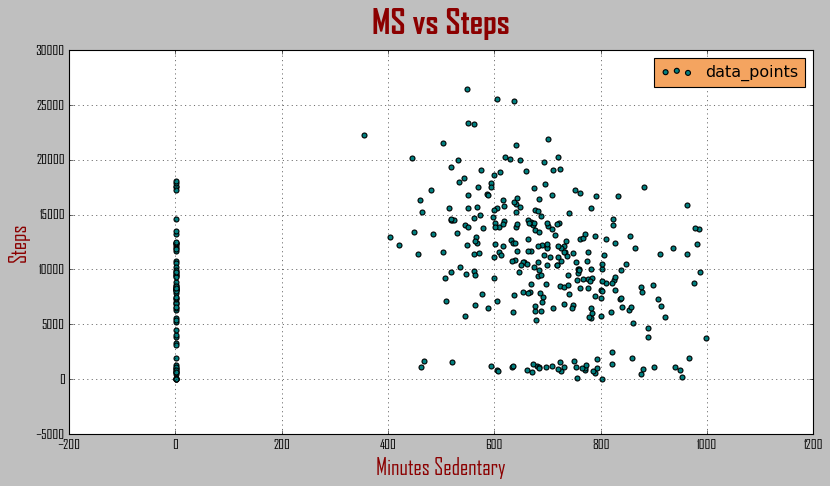

In [146]:
# your code here
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams["font.family"]="agency fb"
#sns.lmplot(x="Minutes Very Active",y="Steps",data=fitbit)
plt.scatter(fitbit["Minutes Sedentary"],fitbit["Steps"],linewidth=1,
            c="teal",edgecolor="k",label="data_points")
plt.style.use("classic")
plt.title("MS vs Steps",size=30,c="darkred",fontweight="bold",pad=15)
plt.grid(True)
plt.xlabel("Minutes Sedentary",size=20,c="darkred")
plt.ylabel("Steps",size=20,c="darkred")
plt.legend(facecolor="sandybrown")

In [63]:
"""
As expected from corr. result 0.07, plot also shows us that there is almost no correlation 
between those two variables.
"""

'\nAs expected from corr. result 0.07, plot also shows us that there is almost no correlation \nbetween those two variables.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [64]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

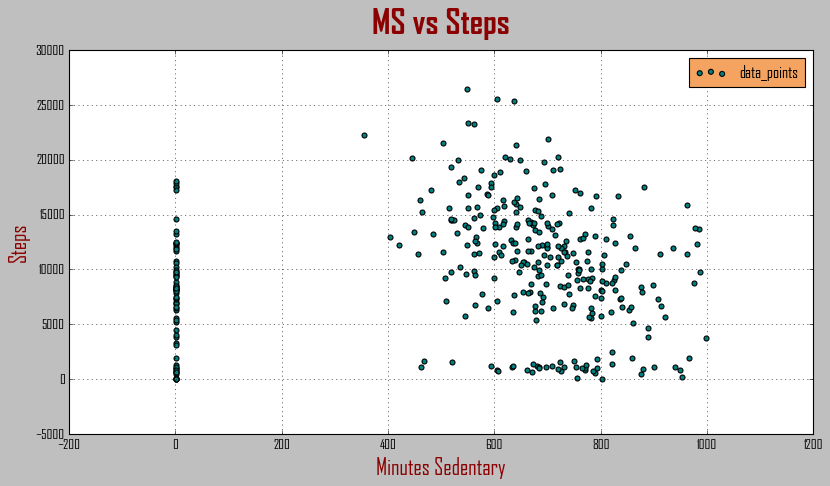

In [144]:
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams["font.family"]="agency fb"
#sns.lmplot(x="Minutes Very Active",y="Steps",data=fitbit)
plt.scatter(fitbit["Minutes Sedentary"],fitbit["Steps"],linewidth=1,
            c="teal",edgecolor="k",label="data_points")
#plt.style.use("classic")
plt.title("MS vs Steps",size=30,c="darkred",fontweight="bold",pad=15)
plt.grid(True)
plt.xlabel("Minutes Sedentary",size=20,c="darkred")
plt.ylabel("Steps",size=20,c="darkred")
plt.legend(facecolor="sandybrown")

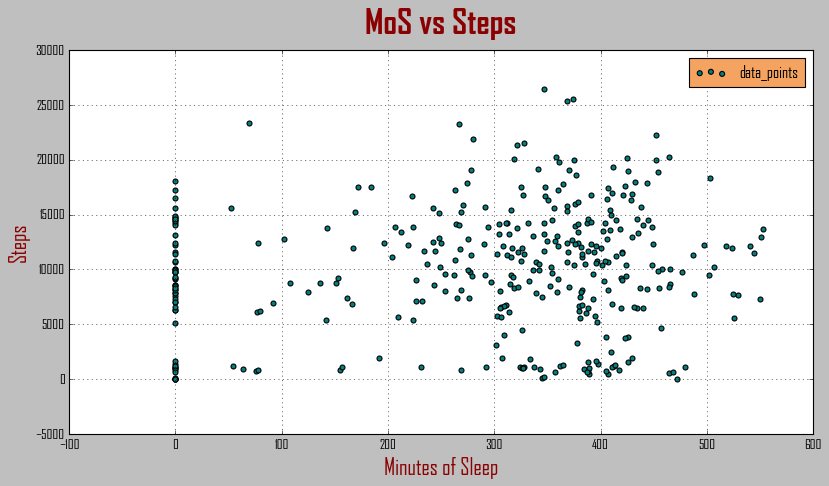

In [143]:
# your code here
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams["font.family"] = "agency fb"
#plt.style.use("classic")
plt.scatter(fitbit["MinutesOfSleep"],fitbit["Steps"],linewidth=1,
           c="teal",edgecolor="k",label="data_points")
plt.title("MoS vs Steps",size=30,c="darkred",fontweight="bold",pad=15)
plt.xlabel("Minutes of Sleep",size=20,c="darkred")
plt.ylabel("Steps",size=20,c="darkred")
plt.legend(facecolor="sandybrown")
plt.grid(True)

In [32]:
"""
Again, as expected from corr result which was 0.13, there is almost no 
relation ship between those two variables.
"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [70]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [83]:
# your code here
fitbit_subset = fitbit[columns]
cor_fit = fitbit_subset.corr()["Steps"].sort_values(ascending=False)
cor_fit

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [84]:
'''
Based on results above, Minutes Very Active column has the highest correlation with Steps.
'''

'\nBased on results above, Minutes Very Active column has the highest correlation with Steps.\n'

# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [89]:
# your code here
time_grades=pd.read_csv("Time_Grades.csv",sep=",")
time_grades.head(4)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7


#### Show visually the frequency distribution of the `time_grades` dataset.

In [90]:
# your code here
time_grades.value_counts()

Name      Study time  Grade
Sonia     10          7        1
Samuel    20          9        1
Pilar     3           2        1
Pedro     6           5        1
Maria     9           7        1
Jose      4           4        1
Jonathan  2           1        1
Gervasio  7           3        1
Gemma     7           8        1
Eva       5           3        1
David     8           9        1
Cristina  13          8        1
Carlos    12          7        1
Ana       18          9        1
Alicia    11          7        1
dtype: int64

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [96]:
# your code here
pearson=time_grades["Study time"].corr(time_grades["Grade"],method='pearson')
spearman=time_grades["Study time"].corr(time_grades["Grade"],method='spearman')
print(f'Pearson Correlation is {pearson}.')
print(f"Spearman correlation is {spearman}.")

Pearson Correlation is 0.7980456073578858.
Spearman correlation is 0.819658753036942.


#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

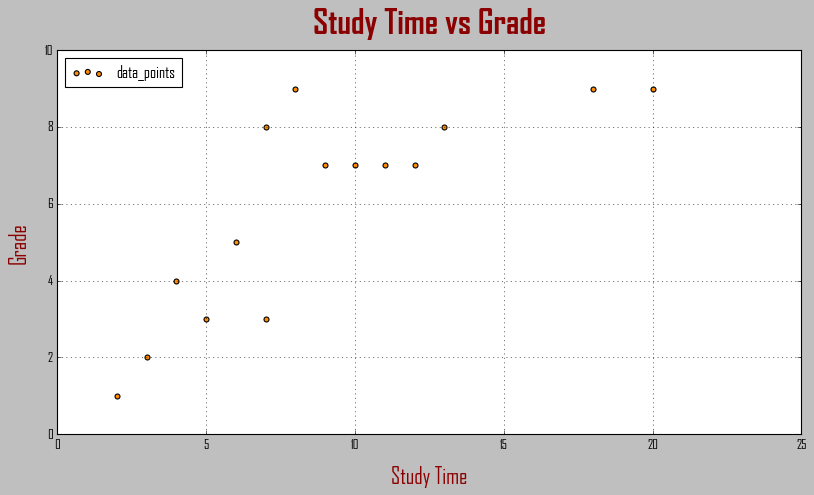

In [137]:
# your code here
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams["font.family"] = "agency fb"
plt.scatter(time_grades["Study time"],time_grades["Grade"],linewidth=1,
            edgecolor="k",color="darkorange",label="data_points")
plt.title("Study Time vs Grade",c="darkred",size=30,fontweight="bold",pad=15)
plt.xlabel("Study Time",size=20,c="darkred",labelpad=13)
plt.ylabel("Grade",size=20,c="darkred",labelpad=13)
plt.legend(loc="upper left")
plt.grid(True)

In [41]:
"""
As it was already expected from correlation results, there is a strong linear correlation
between those two variables.
"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [97]:
"""
Pearson correlation coefficient is most appropriate for measurements taken from an interval scale,


While the Spearman correlation coefficient is more appropriate for measurements taken
from ordinal scales.

I believe since we are looking relationship between study time and grade and both of them are 
in interval scale, it's better in this case to proceed with pearson correlation.
"""

"\nPearson correlation coefficient is most appropriate for measurements taken from an interval scale,\n\n\nWhile the Spearman correlation coefficient is more appropriate for measurements taken\nfrom ordinal scales.\n\nI believe since we are looking relationship between study time and grade and both of them are \nin interval scale, it's better in this case to proceed with pearson correlation.\n"